In [2]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load Data
df = pd.read_csv(r'E:/Student_Budget_Planner_Project/excel/Budget_Analyzer.csv')  
df.head()

,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,...,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method,Total_Income,Total_Expense,Savings,Savings_Percent,Overbudget_Flag
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,...,78,134,127,72,Credit/Debit Card,1228,7707,-6479,-5.276059,Yes
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,...,92,226,129,68,Credit/Debit Card,1881,6756,-4875,-2.591707,Yes
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,...,23,239,112,133,Cash,1662,4810,-3148,-1.894103,Yes
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,...,30,163,105,55,Mobile Payment App,882,6665,-5783,-6.556689,Yes
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,...,71,88,71,104,Credit/Debit Card,1332,5828,-4496,-3.375375,Yes


In [12]:
# Basic Overview
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   gender                    1000 non-null   object 
 2   year_in_school            1000 non-null   object 
 3   major                     1000 non-null   object 
 4   monthly_income            1000 non-null   int64  
 5   financial_aid             1000 non-null   int64  
 6   tuition                   1000 non-null   int64  
 7   housing                   1000 non-null   int64  
 8   food                      1000 non-null   int64  
 9   transportation            1000 non-null   int64  
 10  books_supplies            1000 non-null   int64  
 11  entertainment             1000 non-null   int64  
 12  personal_care             1000 non-null   int64  
 13  technology                1000 non-null   int64  
 14  health_we

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
Total_Income                0
Total_Expense               0
Savings                     0
Savings_Percent             0
Overbudget_Flag             0
dtype: int64

In [14]:
# Visualizations

C:\Users\SUBHADIP\AppData\Local\Temp\ipykernel_21856\1520376295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_expense.values, y=avg_expense.index, palette='Blues_r')


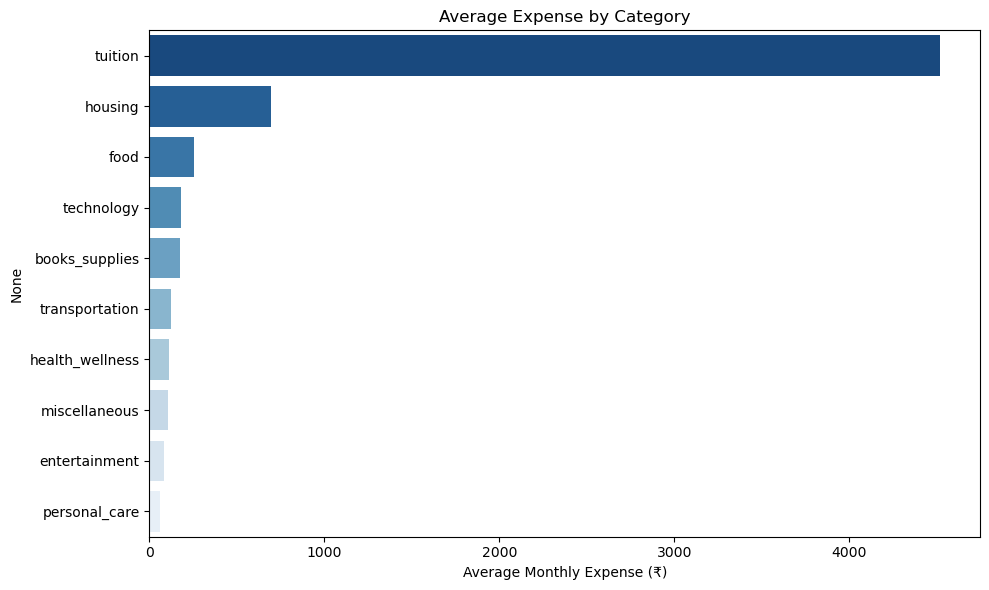

In [15]:
# 1. Average Expense by Category
expense_cols = ['tuition', 'housing', 'food', 'transportation', 'books_supplies',
                'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

avg_expense = df[expense_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_expense.values, y=avg_expense.index, palette='Blues_r')
plt.xlabel("Average Monthly Expense (₹)")
plt.title("Average Expense by Category")
plt.tight_layout()
plt.show()

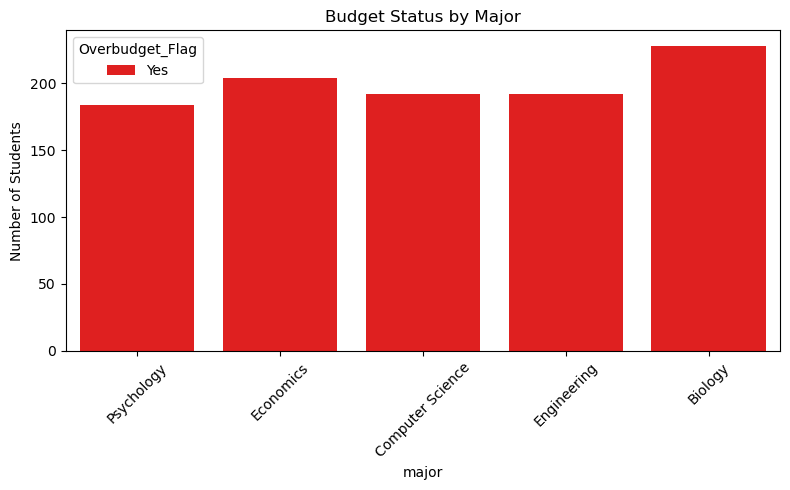

In [19]:
# 2. Budget Status by Major
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='major', hue='Overbudget_Flag', palette={'Yes':'red', 'No':'green'})
plt.title("Budget Status by Major")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

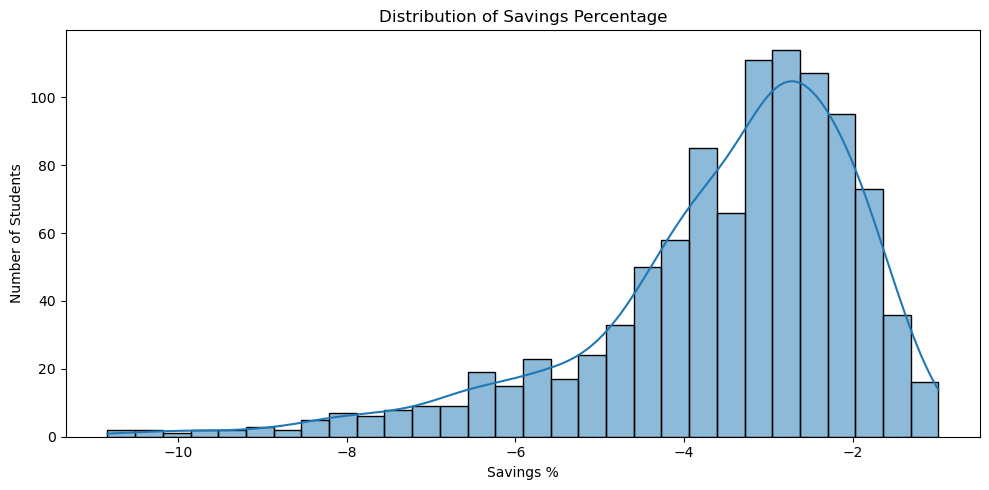

In [18]:
# 3. Savings % Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Savings_Percent'], bins=30, kde=True)
plt.title("Distribution of Savings Percentage")
plt.xlabel("Savings %")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

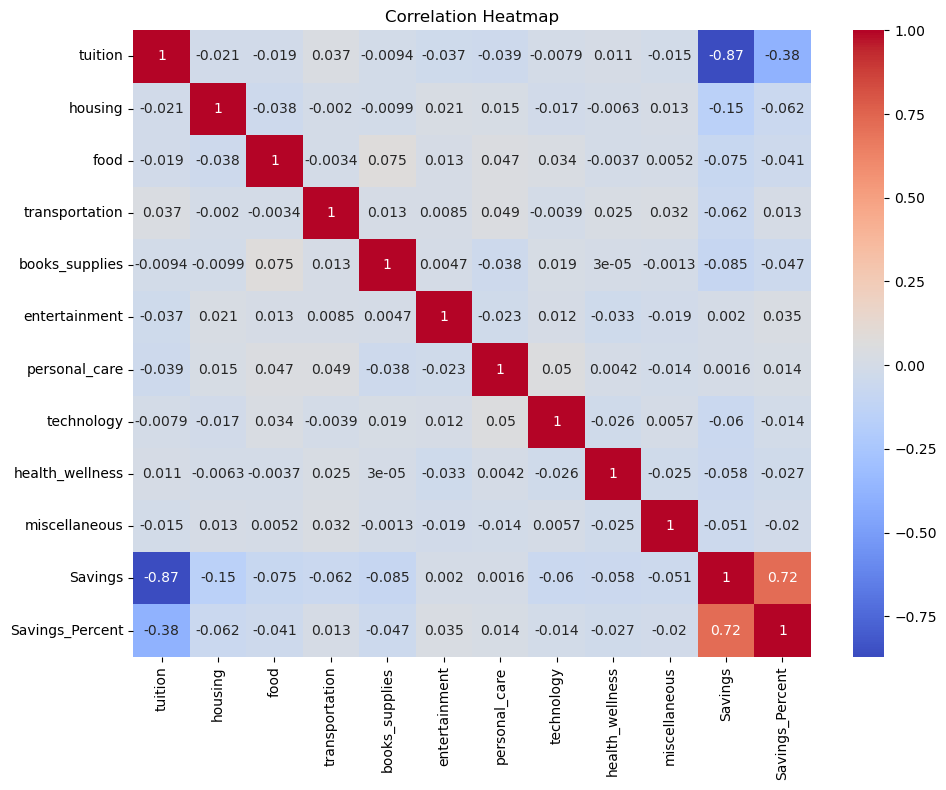

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[expense_cols + ['Savings', 'Savings_Percent']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()